# RODA data

In [1]:
import pandas as pd

INPUT_DATETIME_FORMAT = "%m/%d/%y %H:%M"
OUTPUT_DATETIME_FORMAT = "%Y-%m-%d %H:%M"

original_df = pd.read_csv("./results/datos_roda_processed.csv")
original_df['timestampStart'] = pd.to_datetime(original_df['timestampStart'], format=OUTPUT_DATETIME_FORMAT)
original_df['timestampEnd'] = pd.to_datetime(original_df['timestampEnd'], format=OUTPUT_DATETIME_FORMAT)
original_df['date'] = original_df['timestampStart'].dt.strftime("%Y-%m-%d")

## RODA Number of Delivery Routes per Day, per Device

In [2]:
original_df_counts = original_df[['gpsID', 'date']].value_counts()
original_df_counts

gpsID    date      
Xch1238  2023-12-03    16
         2023-11-28    15
         2023-10-25    15
Xch1553  2023-08-29    14
Xch1238  2023-11-26    14
                       ..
Xch1436  2023-10-10     1
         2023-10-19     1
         2023-10-20     1
         2023-10-22     1
Xch1592  2023-12-11     1
Length: 2509, dtype: int64

The result dataset shows there is not any device logging over 30 delivery routes per day. Indicating everything should be ok, as maximum per day per devices it reports 16 routes.

## Minimum and Maximum Distance Analysis

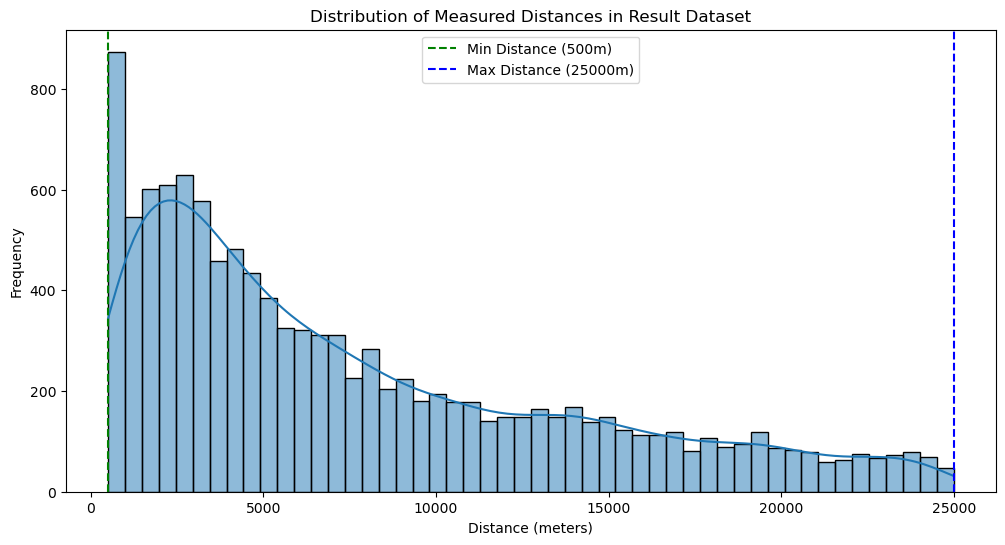

count    11475.000000
mean      7681.226088
std       6294.498709
min        500.218000
25%       2660.350000
50%       5628.080000
75%      11486.350000
max      24996.100000
Name: measuredDistance, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['measuredDistance'], bins=50, kde=True)
plt.title('Distribution of Measured Distances in Result Dataset')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
#plt.xlim(0, 1200)

# initial and proposed thresholds
plt.axvline(500, color='g', linestyle='--', label='Min Distance (500m)')
plt.axvline(25000, color='b', linestyle='--', label='Max Distance (25000m)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['measuredDistance'].describe()
print(distance_stats)

The analysis shows that we are actually filtering out data outside of the valid distance range for a driver delivery route. The average distance per route is 7.6 kilometers. 75% of the routes have a distance of less than 11.4 kilometers. I think we could reduce the upper threshold to 15km to be more realistic with a driver delivery route.

## Duration distribution analysis

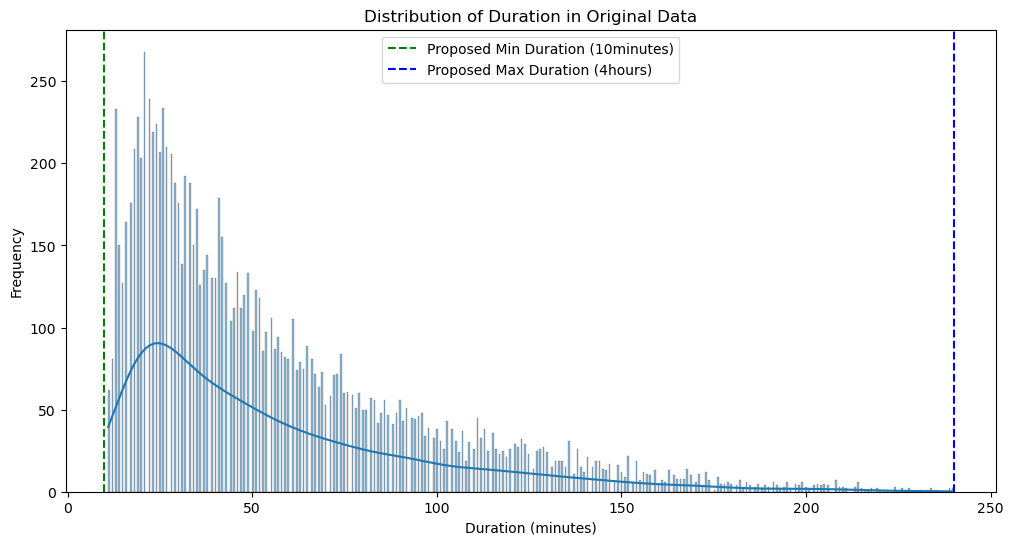

count    11475.000000
mean        56.233377
std         40.447916
min         11.000000
25%         26.000000
50%         43.000000
75%         75.000000
max        240.000000
Name: durationMinutes, dtype: float64


In [9]:
# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['durationMinutes'], bins=500, kde=True)
plt.title('Distribution of Duration in Original Data')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
#plt.xlim(0, 300)

# initial and proposed thresholds
plt.axvline(10, color='g', linestyle='--', label='Proposed Min Duration (10minutes)')
plt.axvline(240, color='b', linestyle='--', label='Proposed Max Duration (4hours)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['durationMinutes'].describe()
print(distance_stats)

While route durations fall within the expected range of 10 to 240 minutes, the current upper limit of 4 hours might be overly high for typical Rappi deliveries. Notably, 75% of routes are completed in less than 75 minutes. Therefore, considering a more realistic maximum estimate of 1.5 hours (90 minutes) could be beneficial. This would allow us to identify and exclude outliers that significantly deviate from the standard Rappi delivery profile, providing more accurate data analysis.

# Guajira Data

In [15]:
INPUT_DATETIME_FORMAT = "%m/%d/%y %H:%M"
OUTPUT_DATETIME_FORMAT = "%Y-%m-%d %H:%M"

original_df = pd.read_csv("./results/datos_guajira_processed.csv")
original_df['timestampStart'] = pd.to_datetime(original_df['timestampStart'], format=OUTPUT_DATETIME_FORMAT)
original_df['timestampEnd'] = pd.to_datetime(original_df['timestampEnd'], format=OUTPUT_DATETIME_FORMAT)
original_df['date'] = original_df['timestampStart'].dt.strftime("%Y-%m-%d")

## Number of Delivery Routes per Day, per Device

In [16]:
original_df_counts = original_df[['gpsID', 'date']].value_counts()
original_df_counts

gpsID    date      
Xch1481  2023-09-20    11
Xch1488  2023-11-27    11
Xch1559  2023-10-24    10
Xch1561  2023-12-01    10
Xch1488  2023-09-20    10
                       ..
Xch1485  2023-12-06     1
         2023-12-05     1
         2023-11-25     1
         2023-11-16     1
Xch1584  2023-12-11     1
Length: 762, dtype: int64

## Minimum and Maximum Distance Analysis

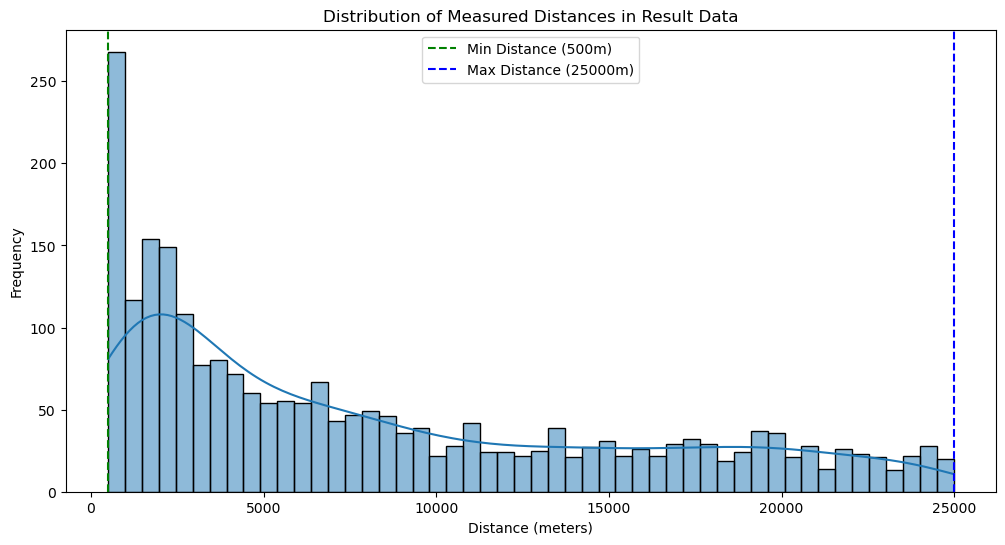

count     2372.000000
mean      8203.172703
std       7108.159164
min        500.886000
25%       2184.285000
50%       5847.590000
75%      13430.350000
max      24981.800000
Name: measuredDistance, dtype: float64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['measuredDistance'], bins=50, kde=True)
plt.title('Distribution of Measured Distances in Result Data')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
#plt.xlim(0, 1200)

# initial and proposed thresholds
plt.axvline(500, color='g', linestyle='--', label='Min Distance (500m)')
plt.axvline(25000, color='b', linestyle='--', label='Max Distance (25000m)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['measuredDistance'].describe()
print(distance_stats)

The analysis shows that we are actually filtering out data outside of the valid distance range for a driver delivery route. The average distance per route is 8.2 kilometers. 75% of the routes have a distance of less than 13.4 kilometers. I think we could reduce the upper threshold to 15km to be more realistic with a driver delivery route.

## Duration distribution analysis

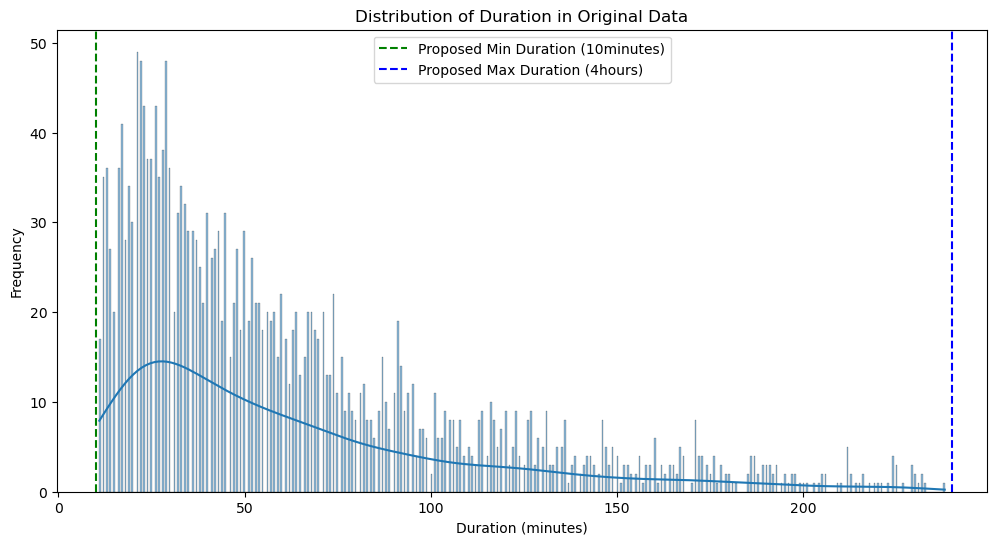

count    2372.000000
mean       63.099494
std        47.471737
min        11.000000
25%        27.000000
50%        48.000000
75%        84.000000
max       238.000000
Name: durationMinutes, dtype: float64


In [19]:
# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['durationMinutes'], bins=500, kde=True)
plt.title('Distribution of Duration in Original Data')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
#plt.xlim(0, 300)

# initial and proposed thresholds
plt.axvline(10, color='g', linestyle='--', label='Proposed Min Duration (10minutes)')
plt.axvline(240, color='b', linestyle='--', label='Proposed Max Duration (4hours)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['durationMinutes'].describe()
print(distance_stats)

While route durations fall within the expected range of 10 to 240 minutes, the current upper limit of 4 hours might be overly high for typical Rappi deliveries. Notably, 75% of routes are completed in less than 84 minutes. Therefore, considering a more realistic maximum estimate of 1.5 hours (90 minutes) could be beneficial. This would allow us to identify and exclude outliers that significantly deviate from the standard Rappi delivery profile, providing more accurate data analysis.